# Aprendizaje no supervisado - ALGORITMO DE CLUSTERING DBSCAN

Carga de librerías 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneebow.rotor import Rotor
#from kneed import KneeLocator
import warnings
warnings.filterwarnings("ignore")

Carga del Dataset

In [4]:
df = pd.read_csv("./datasets/Mall_Customers.csv")

In [5]:
# Extracción de las columnas correspondientes a ingresos anuales y puntuación de gastos
df = df.iloc[:,[3,4]].values

Ahora mostramos una gráfica que visualice el conjunto de datos

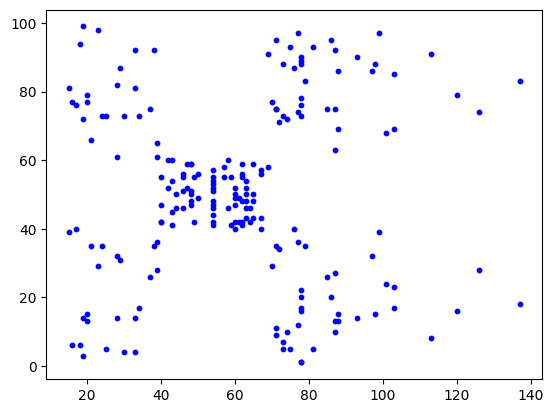

In [6]:
plt.scatter(df[:,0], df[:,1], s=10, c= "blue")

En la siguiente función se calcula la distancia *k* para determinar el valor de *epsilon*

In [7]:
def calculate_kn_distance(X, neigh=2):
    neigh = NearestNeighbors(n_neighbors=neigh)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    return distances[:,1:].reshape(-1)

A continuación, en esta otra función, se obtiene el valor exacto de *epsilon* usando *kneebow*. Esta librería nos permite encontrar el **codo** de una curva rotando la misma y tomando el valor mínimo.

In [8]:
def get_eps(X, neigh=2):
    eps_dist = np.sort(calculate_kn_distance(X, neigh=neigh))
    rotor = Rotor()
    curve_xy = np.concatenate([np.arange(eps_dist.shape[0]).reshape(-1, 1), eps_dist.reshape(-1, 1)],1)
    rotor.fit_rotate(curve_xy)
    rotor.plot_elbow()
    e_idx = rotor.get_elbow_index()
    return curve_xy[e_idx]

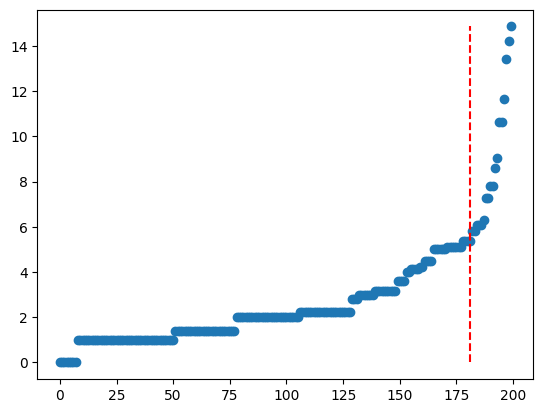

5.385164807134504


In [9]:
idx, eps = get_eps(df)  # Llamada a las funciones
plt.show()              # Ploteado 
print(eps)              # Valor exacto de  EPSILON


Ejecución del DBSCAN pasándo como parámetros el valor hallado para EPSILON y un número estimado de puntos mínimos para considerar un clúster (min_samples) = 5

In [10]:
clusters = DBSCAN(eps=5, min_samples=5).fit(df)

Etiquetado de cada punto de datos en un clúster, desde -1 (ruido) hasta 4 (último clúster visitado)

In [11]:
labels = clusters.labels_

Ploteado de la gráfica añadiendo distintos colores para cada etiqueta

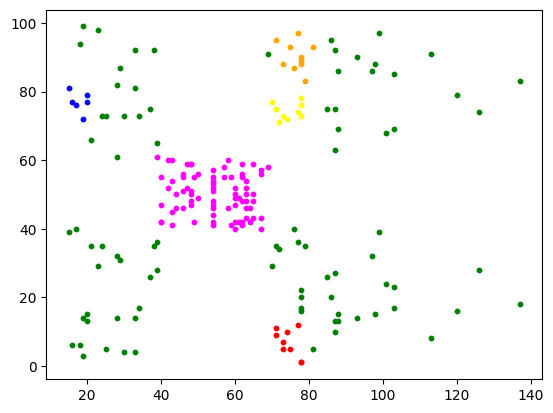

In [12]:
plt.scatter(df[labels == -1, 0 ], df[labels == -1, 1], s = 10, c = 'green' )
plt.scatter(df[labels == 0, 0 ], df[labels == 0, 1], s = 10, c = 'blue' )
plt.scatter(df[labels == 1, 0 ], df[labels == 1, 1], s = 10, c = 'magenta' )
plt.scatter(df[labels == 2, 0 ], df[labels == 2, 1], s = 10, c = 'yellow' )
plt.scatter(df[labels == 3, 0 ], df[labels == 3, 1], s = 10, c = 'red' )
plt.scatter(df[labels == 4, 0 ], df[labels == 4, 1], s = 10, c = 'orange' )
plt.show()

En conclusión, el algoritmo DBSCAN es un método versátil y eficaz para la agrupación de datos en una variedad de aplicaciones. Particularmente es adecuado para manipular datos con formas irregulares y densidades variables, y es capaz de identificar puntos de ruido y valores atípicos en la información. 

Sin embargo, como cualquier otro algoritmo de agrupación, DBSCAN tiene ciertas limitaciones y supuestos que deben ser tomados en cuenta a la hora de aplicarlo en datos del mundo real. Por ejemplo, supone que las agrupaciones son regiones densas separadas por zonas de menor densidad, y no funciona correctamente con datos que tienen niveles de densidad muy diferentes o puntos de ruido que se encuentran distribuidos a través de toda la información.  
 
Además, se requiere especial cuidado a la hora de seleccionar los parámetros, tales como el tamaño del radio hasta donde admite vecinos y el número mínimo de puntos requeridos para formar un grupo, los cuales pueden afectar los resultados de las agrupaciones.